## Building a program that can detect lane lines in a picture or video utilizing computer vision.

### We'll begin by identifying lanes in the following .jpg image.
#### We'll utilize OpenCV, an open source computer vision library.
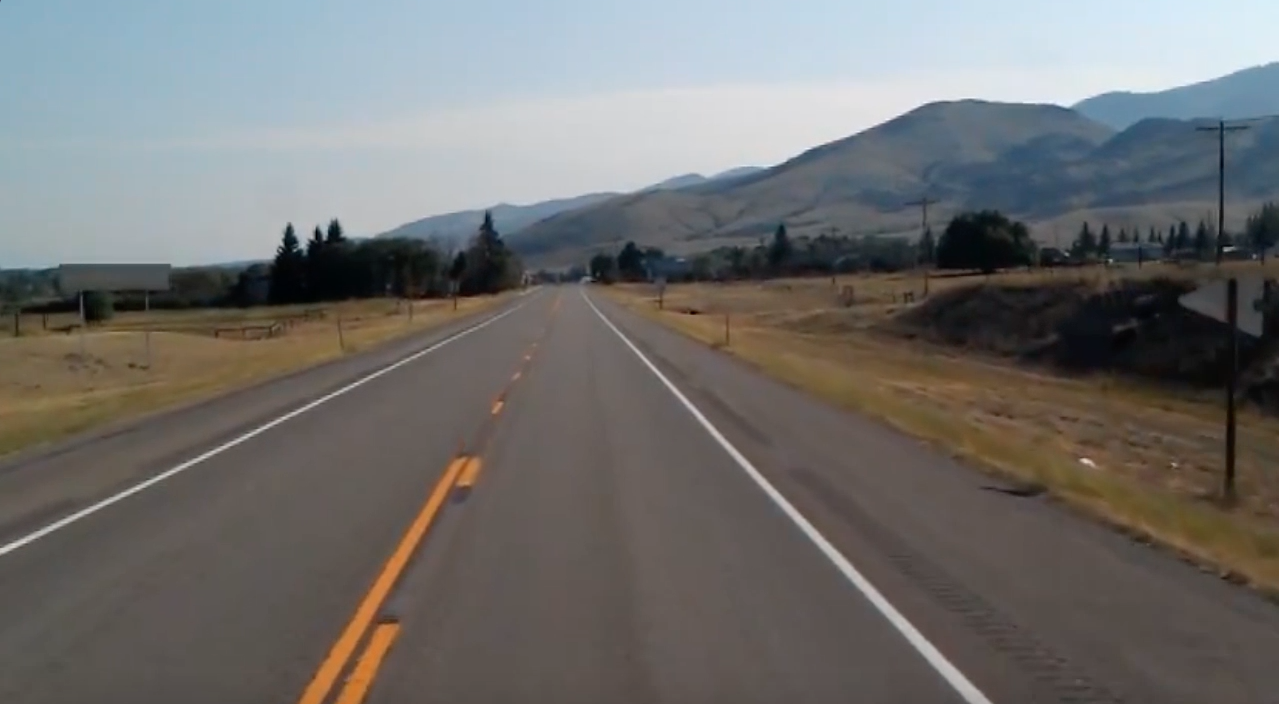

In [ ]:
# Load and display images using the OpenCV library:

import cv2

# Read image from file, return as a multi-dimensional numpy array.
image = cv2.imread('test_image.jpg')

# 'Result' will be the window name:
cv2.imshow('result', image)
# This function displays the image for the set period of time, 0=infinite
cv2.waitKey(0)

### Utilizing Canny Edge-Detection Algorithm
Find areas of an image where there is a strong change in image intensity.
Image intensity levels can range from 0-255: 0=Dark 255=Bright

Gradient: Change in brightness over a series of pixels.
Strong Gradient = Big change in brightness
Weak Gradient = Small change in brightness

Start by converting image to greyscale to change 3 channels to 1 channel.


In [ ]:
# Convert image to grayscale

import cv2
import numpy as np

image = cv2.imread('test_image.jpg')
# Create a copy of the array (image above)
lane_image = np.copy(image)
# Create a greyscale from the color image
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)

# Display gray image
cv2.imshow('result', gray)
cv2.waitKey(0)

In [ ]:
# Reduce noise in the image - Noise can create false edges
# Filtering out noise and smoothing is done with a Gaussian Blur

# Code to apply a Gaussian blur on a gray-scale image with a 5x5 kernel
# Returns a new image called 'blur'
# blur = cv2.GaussianBlur(gray, (5, 5), 0)

In [ ]:
# Convert image to grayscale

import cv2
import numpy as np

image = cv2.imread('test_image.jpg')
# Create a copy of the array (image above)
lane_image = np.copy(image)
# Create a greyscale from the color image
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
# Note: canny method will call a 5x5 Gaussian anyways, so this step is optional
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Display gray image
cv2.imshow('result', gray)
cv2.waitKey(0)

#### Now apply canny method to detect edges in image
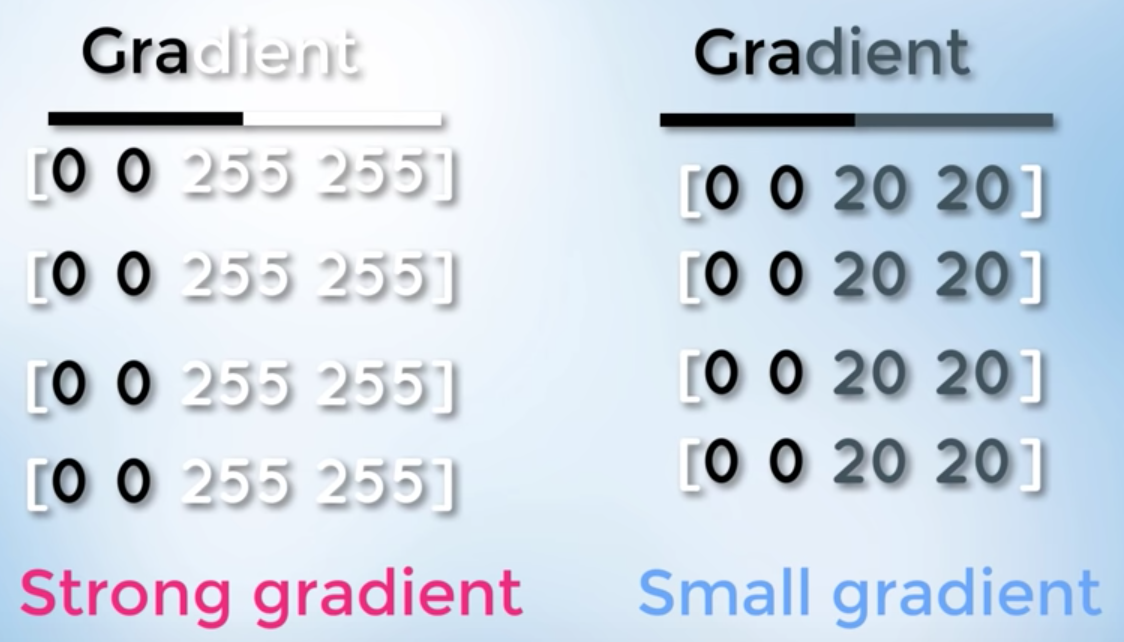

The canny function will compute the gradient in all directions of the image:

'low_threshold' & 'high_threshold' allows us to isolate the adjacent pixels that follow the strongest gradients. If the gradient is higher than the upper threshold it is accepted as an edge pixel, if it is lower than the low_threshold it is rejected. If it is inbetween, it will be accepted only if it is connected to a strong edge.

Documentation recommends a rate of 1:2 or 1:3
#### cv2.Canny(image, low_threshold, high_threshold)

In [ ]:
import cv2
import numpy as np

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# cv2.Canny(image, low_threshold, high_threshold)
canny = cv2.Canny(blur, 50, 150)

# Output the 'canny' image
cv2.imshow('result', canny)
cv2.waitKey(0)

# Traces that exceed the high-threshhold are traced in white.

#### Apply the huff transform method to detect lane lines.
First, specify a region of interest.

In [ ]:
import cv2
import numpy as np

# Wrap code inside a function
def canny(image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
    
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)

cv2.imshow('result', canny)
cv2.waitKey(0)

Use the Matplot lib library to clarify how to isolate the region:
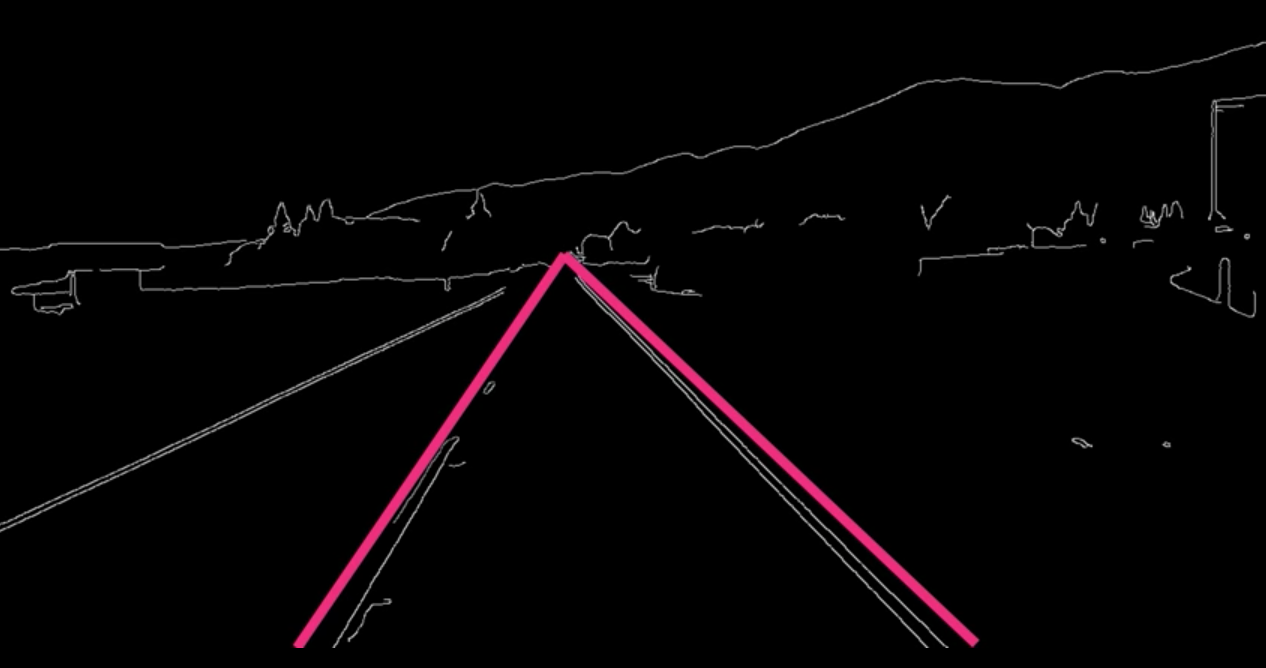

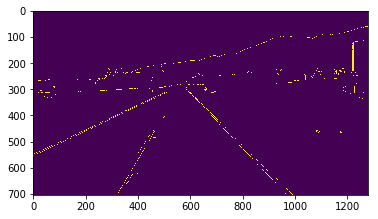

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
    
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)

plt.imshow(canny)
plt.show()

# This will output the image with axis labels, which we can use to limit the field of view.

#### Defining Lane Lines -- Bitwise_and

In [ ]:
# First, we revert to viewing the image with OpenCV, rather than matplot.lib

import cv2
import numpy as np

# Wrap code inside a function:
def canny(image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
 
# Define a function for the region of interest:
def region_of_interest(image):
    # Shape of the array is denoted by a tuple of integers
    height = image.shape[0]
    # An array of one polygon
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
    # Fill the mask with our polygon
    cv2.fillPoly(mask, polygons, 255)
    # Mask the image, implement py operator 'and'
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)

cv2.imshow('result', cropped_image)
cv2.waitKey(0)

#### Finding Lane Lines -- Hough Transform
Detect straight lines in the image.

*** Review theory on Hough Space ***

In [ ]:
# First, we revert to viewing the image with OpenCV, rather than matplot.lib

import cv2
import numpy as np

# Wrap code inside a function:
def canny(image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
 
# Define a function for the region of interest:
def region_of_interest(image):
    # Shape of the array is denoted by a tuple of integers
    height = image.shape[0]
    # An array of one polygon
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
    # Fill the mask with our polygon
    cv2.fillPoly(mask, polygons, 255)
    # Mask the image, implement py operator 'and'
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
# Detecting lines in the cropped gradient image:
# 2 pixels with a single degree precision
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

cv2.imshow('result', cropped_image)
cv2.waitKey(0)

In [ ]:
# Now we will display the lines above into our actual image:

import cv2
import numpy as np

# Wrap code inside a function:
def canny(image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    # Check if array is not empty
    if lines is not None:
        for line in lines:
            # Reshape every line into a 1-dimensional array, with 4 elements
            # Unpack the array elements into 4 different elements
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
            
# Define a function for the region of interest:
def region_of_interest(image):
    # Shape of the array is denoted by a tuple of integers
    height = image.shape[0]
    # An array of one polygon
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
    # Fill the mask with our polygon
    cv2.fillPoly(mask, polygons, 255)
    # Mask the image, implement py operator 'and'
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
# Detecting lines in the cropped gradient image:
# 2 pixels with a single degree precision
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
# Pass in the original jpeg and the detected lines
line_image = display_lines(lane_image, lines)

cv2.imshow('result', line_image)
cv2.waitKey(0)

In [ ]:
# Now we will display the lines above, in blue, onto a black image

import cv2
import numpy as np

# Wrap code inside a function:
def canny(image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    # Check if array is not empty
    if lines is not None:
        for line in lines:
            # Reshape every line into a 1-dimensional array, with 4 elements
            # Unpack the array elements into 4 different elements
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
            
# Define a function for the region of interest:
def region_of_interest(image):
    # Shape of the array is denoted by a tuple of integers
    height = image.shape[0]
    # An array of one polygon
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
    # Fill the mask with our polygon
    cv2.fillPoly(mask, polygons, 255)
    # Mask the image, implement py operator 'and'
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
# Detecting lines in the cropped gradient image:
# 2 pixels with a single degree precision
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
# Pass in the original jpeg and the detected lines
line_image = display_lines(lane_image, lines)

cv2.imshow('result', line_image)
cv2.waitKey(0)

In [ ]:
# Now we will display the lines above, in blue, onto the original image

import cv2
import numpy as np

# Wrap code inside a function:
def canny(image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    # Check if array is not empty
    if lines is not None:
        for line in lines:
            # Reshape every line into a 1-dimensional array, with 4 elements
            # Unpack the array elements into 4 different elements
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
            
# Define a function for the region of interest:
def region_of_interest(image):
    # Shape of the array is denoted by a tuple of integers
    height = image.shape[0]
    # An array of one polygon
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
    # Fill the mask with our polygon
    cv2.fillPoly(mask, polygons, 255)
    # Mask the image, implement py operator 'and'
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
# Detecting lines in the cropped gradient image:
# 2 pixels with a single degree precision
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
# Pass in the original jpeg and the detected lines
line_image = display_lines(lane_image, lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

cv2.imshow('result', combo_image)
cv2.waitKey(0)

#### Finding Lane Lines - Optimization

In [ ]:
# Now we will display the lines above, in blue, onto the original image

import cv2
import numpy as np

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    print(left_fit_average, 'left')
    print(left_fit_average, 'right')
    
# Wrap code inside a function:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    # Check if array is not empty
    if lines is not None:
        for line in lines:
            # Reshape every line into a 1-dimensional array, with 4 elements
            # Unpack the array elements into 4 different elements
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
            
# Define a function for the region of interest:
def region_of_interest(image):
    # Shape of the array is denoted by a tuple of integers
    height = image.shape[0]
    # An array of one polygon
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
    # Fill the mask with our polygon
    cv2.fillPoly(mask, polygons, 255)
    # Mask the image, implement py operator 'and'
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny_image = canny(lane_image)
cropped_image = region_of_interest(canny_image)
# Detecting lines in the cropped gradient image:
# 2 pixels with a single degree precision
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
#
averaged_lines = average_slope_intercept(lane_image, lines)
# Pass in the original jpeg and the detected lines
line_image = display_lines(lane_image, lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

cv2.imshow('result', combo_image)
cv2.waitKey(0)

[  -1.61019355 1201.00387097] left
[  -1.61019355 1201.00387097] right


In [ ]:
# Specify coordinates of where you want the lines placed
# Averaging out several lines, into 1 good looking straight line

import cv2
import numpy as np

def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1, y1, x2, y2])

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])
    
# Wrap code inside a function:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    # Check if array is not empty
    if lines is not None:
        for line in lines:
            # Reshape every line into a 1-dimensional array, with 4 elements
            # Unpack the array elements into 4 different elements
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
            
# Define a function for the region of interest:
def region_of_interest(image):
    # Shape of the array is denoted by a tuple of integers
    height = image.shape[0]
    # An array of one polygon
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
    # Fill the mask with our polygon
    cv2.fillPoly(mask, polygons, 255)
    # Mask the image, implement py operator 'and'
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny_image = canny(lane_image)
cropped_image = region_of_interest(canny_image)
# Detecting lines in the cropped gradient image:
# 2 pixels with a single degree precision
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
#
averaged_lines = average_slope_intercept(lane_image, lines)
# Pass in the original jpeg and the detected lines
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

cv2.imshow('result', combo_image)
cv2.waitKey(0)

#### Finding Lane Lines in every frame of a video

In [1]:
# Detecting lines in video

import cv2
import numpy as np

def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1, y1, x2, y2])

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])
    
# Wrap code inside a function:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    # Check if array is not empty
    if lines is not None:
        for line in lines:
            # Reshape every line into a 1-dimensional array, with 4 elements
            # Unpack the array elements into 4 different elements
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
            
# Define a function for the region of interest:
def region_of_interest(image):
    # Shape of the array is denoted by a tuple of integers
    height = image.shape[0]
    # An array of one polygon
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
    # Fill the mask with our polygon
    cv2.fillPoly(mask, polygons, 255)
    # Mask the image, implement py operator 'and'
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

cap = cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
    _, frame = cap.read()
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    # Detecting lines in the cropped gradient image:
    # 2 pixels with a single degree precision
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    #
    averaged_lines = average_slope_intercept(frame, lines)
    # Pass in the original jpeg and the detected lines
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)

    cv2.imshow('result', combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#### Thank you!